In [ ]:
#remember about clearing cache after changes in other files

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

##if not working, try 'activate tensorflow' in console/terminal
print(tf.__version__)

2.4.1


In [101]:
#load images as arrays
from filesService import getNumbers
labels, images = getNumbers()
print(images)
print('labels and images loaded to memory')


4 254 ... 254 254 252]
  [255 254 254 ... 254 254 254]
  ...
  [254 254 253 ... 253 254 254]
  [254 254 252 ... 254 254 253]
  [254 254 254 ... 253 254 254]]

 [[253 254 254 ... 254 254 254]
  [253 254 254 ... 253 253 254]
  [252 254 254 ... 254 253 253]
  ...
  [253 254 255 ... 254 254 254]
  [251 253 254 ... 254 254 254]
  [252 253 252 ... 255 255 253]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 254 253 ... 255 255 254]
  [254 254 255 ... 254 255 254]]

 [[253 254 253 ... 254 254 252]
  [253 253 252 ... 254 253 252]
  [253 252 250 ... 254 252 253]
  ...
  [253 253 253 ... 254 254 252]
  [254 254 254 ... 253 254 250]
  [253 253 251 ... 254 253 252]]

 [[254 254 254 ... 255 254 254]
  [254 254 254 ... 255 255 255]
  [254 254 254 ... 254 255 254]
  ...
  [254 253 253 ... 255 254 254]
  [254 254 255 ... 255 255 255]
  [254 255 255 ... 254 255 255]]]
labels and images loaded to memory


In [63]:
preparedImages = images / 255
print(preparedImages)

        0.99607843]
  [0.99607843 0.99607843 1.         ... 0.99607843 1.         0.99607843]]

 [[0.99215686 0.99607843 0.99215686 ... 0.99607843 0.99607843 0.98823529]
  [0.99215686 0.99215686 0.98823529 ... 0.99607843 0.99215686 0.98823529]
  [0.99215686 0.98823529 0.98039216 ... 0.99607843 0.98823529 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686 ... 0.99607843 0.99607843 0.98823529]
  [0.99607843 0.99607843 0.99607843 ... 0.99215686 0.99607843 0.98039216]
  [0.99215686 0.99215686 0.98431373 ... 0.99607843 0.99215686 0.98823529]]

 [[0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843 ... 1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843 ... 0.99607843 1.         0.99607843]
  ...
  [0.99607843 0.99215686 0.99215686 ... 1.         0.99607843 0.99607843]
  [0.99607843 0.99607843 1.         ... 1.         1.         1.        ]
  [0.99607843 1.         1.         ... 0.99607843 1.         1.        ]]]


In [64]:
print(type(labels))
print(type(preparedImages))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(preparedImages.shape)
print(max(preparedImages[0][0]))
print(max(preparedImages[1][0]))
print(min(preparedImages[0][0]))
print(min(preparedImages[1][0]))

(600, 16, 16)
255
255
253
250


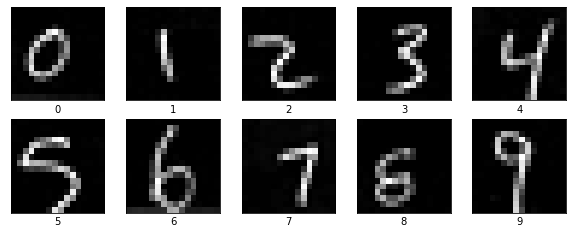

In [65]:
serie = 0

plt.figure(figsize=(10,10))
prevLabel = -1
for i in range(0, len(labels)):
    if labels[i] == prevLabel:
        continue
    plt.subplot(5,5,int(labels[i])+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preparedImages[i+serie], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
    prevLabel = labels[i]
plt.show()

In [78]:
preparedImages.shape

(600, 16, 16)

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(16, 16)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
print(model.built)

True


In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [111]:
def mapLabels(x):
    return int(x)
convertedLabels = np.array(list(map(mapLabels, labels)))
convertedLabels

, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9])

In [112]:
model.fit(preparedImages, convertedLabels, epochs=10)

Epoch 1/10
19/19 [==============================] - 0s 1ms/step - loss: 2.2592 - accuracy: 0.1800
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 2.1990 - accuracy: 0.2533
Epoch 3/10
19/19 [==============================] - 0s 1ms/step - loss: 2.1678 - accuracy: 0.2467
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 2.1729 - accuracy: 0.2050
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 2.1610 - accuracy: 0.2533
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 2.1339 - accuracy: 0.2367
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 2.1409 - accuracy: 0.2533
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 2.1192 - accuracy: 0.2717
Epoch 9/10
19/19 [==============================] - 0s 1ms/step - loss: 2.0870 - accuracy: 0.2867
Epoch 10/10
19/19 [==============================] - 0s 1ms/step - loss: 2.0531 - accuracy: 0.4083


In [119]:
test_loss, test_acc = model.evaluate(preparedImages[:90],  convertedLabels[:90], verbose=2)

3/3 - 0s - loss: 2.0710 - accuracy: 0.3111


In [116]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [123]:
%tensorboard 

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-03-23 22:05:08.593589: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-23 22:05:08.595156: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.